In [1]:
import sqlite3
import matplotlib.pyplot as plt


In [3]:
conn = sqlite3.connect("cwurData.db")
cursor = conn.cursor()


In [7]:
print("\n აშშ-ის ტოპ 10 უნივერსიტეტი:")
cursor.execute("""
    SELECT institution, country, world_rank 
    FROM cwurData 
    WHERE country = 'USA' AND world_rank <= 10
""")
rows = cursor.fetchall()
for row in rows:
    print(row)



 აშშ-ის ტოპ 10 უნივერსიტეტი:
('Harvard University', 'USA', 1)
('Massachusetts Institute of Technology', 'USA', 2)
('Stanford University', 'USA', 3)
('California Institute of Technology', 'USA', 5)
('Princeton University', 'USA', 6)
('Yale University', 'USA', 8)
('Columbia University', 'USA', 9)
('University of California, Berkeley', 'USA', 10)
('Harvard University', 'USA', 1)
('Stanford University', 'USA', 2)
('Massachusetts Institute of Technology', 'USA', 4)
('Columbia University', 'USA', 6)
('University of California, Berkeley', 'USA', 7)
('Princeton University', 'USA', 8)
('University of Chicago', 'USA', 9)
('Yale University', 'USA', 10)
('Harvard University', 'USA', 1)
('Stanford University', 'USA', 2)
('Massachusetts Institute of Technology', 'USA', 3)
('Columbia University', 'USA', 6)
('University of California, Berkeley', 'USA', 7)
('University of Chicago', 'USA', 8)
('Princeton University', 'USA', 9)
('Yale University', 'USA', 10)
('Harvard University', 'USA', 1)
('Stanford U

In [8]:
institution = input("შეიყვანე უნივერსიტეტის სახელი: ")
country = input("შეიყვანე ქვეყანა: ")
world_rank = int(input("შეიყვანე რეიტინგი (world_rank): "))

cursor.execute("""
    INSERT INTO cwurData (institution, country, world_rank)
    VALUES (?, ?, ?)
""", (institution, country, world_rank))
conn.commit()
print("უნივერსიტეტი დაემატა ცხრილში")

შეიყვანე უნივერსიტეტის სახელი:  btu
შეიყვანე ქვეყანა:  georgia
შეიყვანე რეიტინგი (world_rank):  1


უნივერსიტეტი დაემატა ცხრილში


In [9]:
inst_to_update = input("შეიყვანე უნივერსიტეტის სახელი, რომლის რეიტინგიც გსურს შეცვალო: ")
new_rank = int(input("შეიყვანე ახალი რეიტინგი: "))

cursor.execute("""
    UPDATE cwurData
    SET world_rank = ?
    WHERE institution = ?
""", (new_rank, inst_to_update))
conn.commit()
print("ჩანაწერი განახლდა")


შეიყვანე უნივერსიტეტის სახელი, რომლის რეიტინგიც გსურს შეცვალო:  Harvad
შეიყვანე ახალი რეიტინგი:  9


ჩანაწერი განახლდა


In [11]:
rank_threshold = int(input("წაშალე უნივერსიტეტები, რომელთა რეიტინგი მეტია შემდეგზე: "))

cursor.execute("""
    DELETE FROM cwurData
    WHERE world_rank > ?
""", (rank_threshold,))
conn.commit()
print("მონაცემები წარმატებით წაიშალა")

წაშალე უნივერსიტეტები, რომელთა რეიტინგი მეტია შემდეგზე:  9


მონაცემები წარმატებით წაიშალა


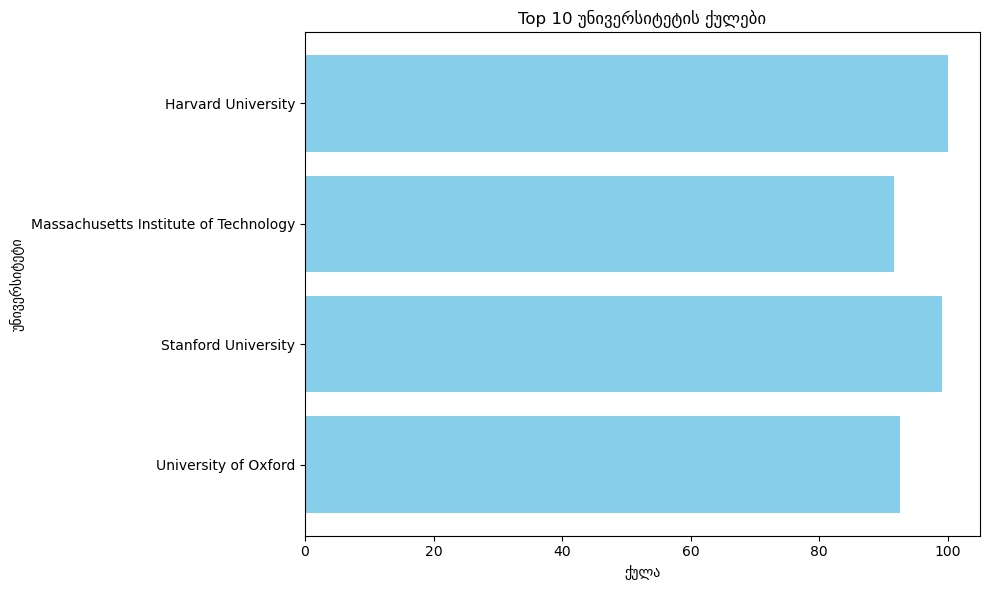

In [13]:
cursor.execute("""
    SELECT institution, score
    FROM cwurData
    WHERE score IS NOT NULL
    ORDER BY world_rank ASC
    LIMIT 10
""")
data = cursor.fetchall()

inst_names = [row[0] for row in data]
scores = [row[1] for row in data]

plt.figure(figsize=(10,6))
plt.barh(inst_names, scores, color='skyblue')
plt.title("Top 10 უნივერსიტეტის ქულები")
plt.xlabel("ქულა")
plt.ylabel("უნივერსიტეტი")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

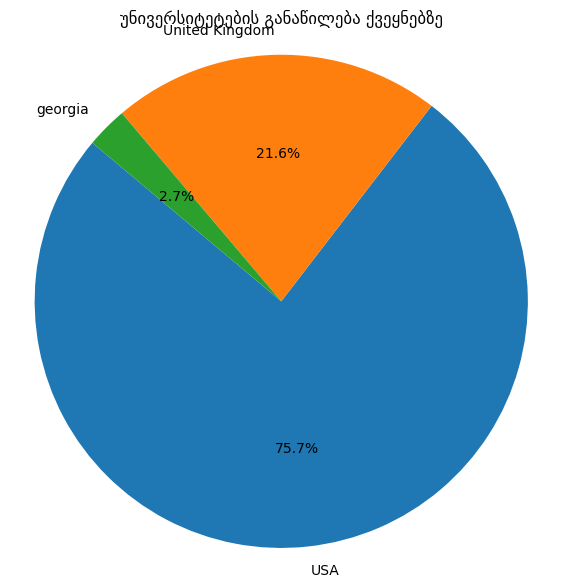

In [14]:
cursor.execute("""
    SELECT country, COUNT(*) as total
    FROM cwurData
    GROUP BY country
    ORDER BY total DESC
    LIMIT 5
""")
data = cursor.fetchall()

countries = [row[0] for row in data]
counts = [row[1] for row in data]

plt.figure(figsize=(7,7))
plt.pie(counts, labels=countries, autopct='%1.1f%%', startangle=140)
plt.title("უნივერსიტეტების განაწილება ქვეყნებზე")
plt.axis('equal')
plt.show()

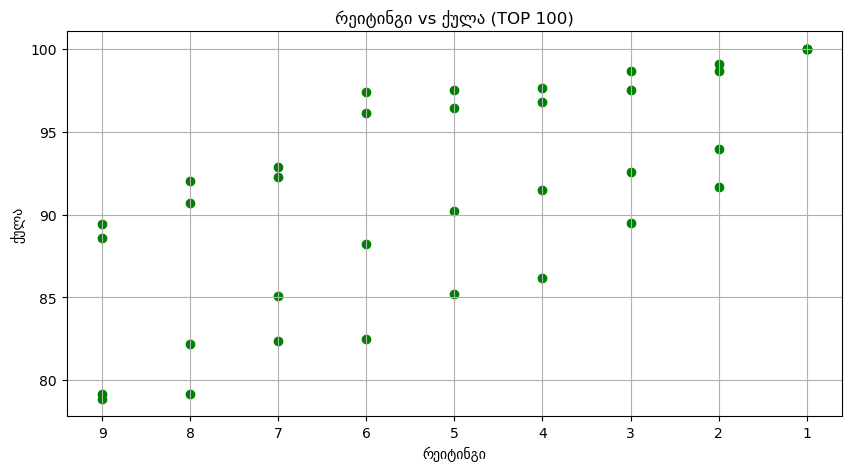

კავშირი ბაზასთან გაწყვეტილია


In [15]:
cursor.execute("""
    SELECT world_rank, score
    FROM cwurData
    WHERE world_rank <= 100
""")
data = cursor.fetchall()

ranks = [row[0] for row in data]
scores = [row[1] for row in data]

plt.figure(figsize=(10,5))
plt.scatter(ranks, scores, color='green')
plt.title("რეიტინგი vs ქულა (TOP 100)")
plt.xlabel("რეიტინგი")
plt.ylabel("ქულა")
plt.gca().invert_xaxis()
plt.grid(True)
plt.show()
conn.close()
print("კავშირი ბაზასთან გაწყვეტილია")